#17.1 Interpolation Problem Statement

Given a data set [x_i , y_i ], interpolation can be used to determine an estimation function such that y(x_i) = y_i . The resulting function is called an interpolation function.

This interpolation function can be used to estimate the value of points that fall within the range of the given data set. (Such as the true y-value of the red dot on the below plot).

**Doesn't require underlying model for data, but processes in which data is gathered do inform how quality the interpolation is.


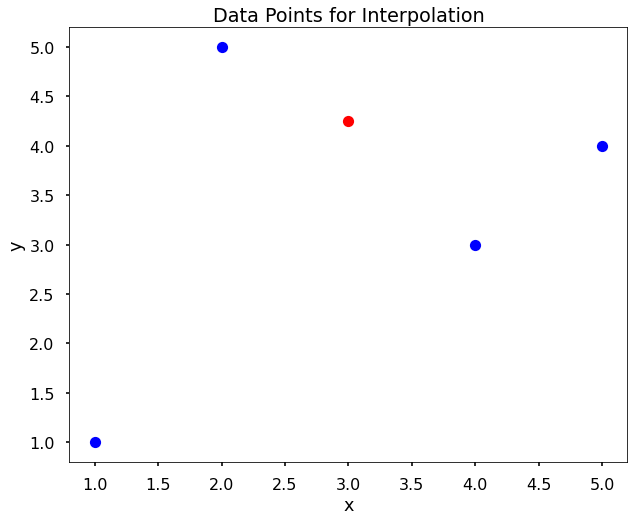

In [2]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-poster')

x = [1,2,4,5]
y = [1,5,3,4]
plt.figure(figsize = (10,8))
plt.plot(x,y,'bo', 3,4.25,'ro') 
plt.title('Data Points for Interpolation')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

#17.2 Linear Interpolation

Linear Interpolation - The estimated point is assumed to lie on the line joining the nearest points to the left and right

Assuming that the x-data points are in ascending order (x_i < x < x_iplus1): 

  y(x) = y_i + ( (y_iplus1 - y_1)*(x - x_i) ) / (x_iplus1 - x_i)
  

2.75


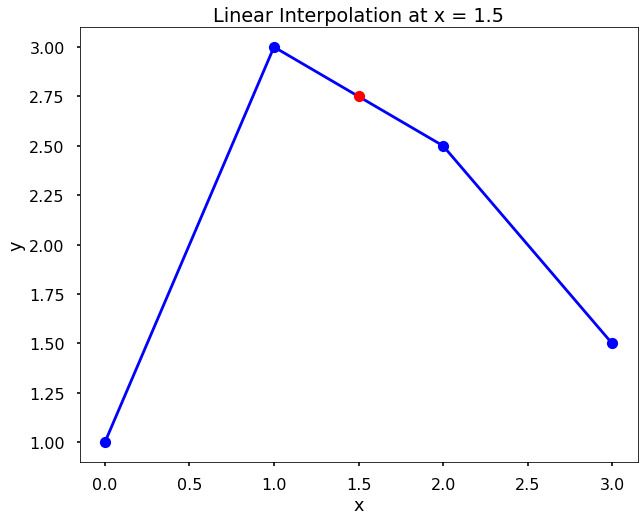

In [10]:
from scipy.interpolate import interp1d 
import matplotlib.pyplot as plt
plt.style.use('seaborn-poster')

x = [0,1,2,3]
y = [1,3,2.5,1.5]
f = interp1d(x,y)
y_inter = f(1.5)
print(y_inter)    # Prints 2.75

plt.figure(figsize = (10,8))
plt.plot(x,y,'-ob',1.5,y_inter,'ro') 
plt.title('Linear Interpolation at x = 1.5')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

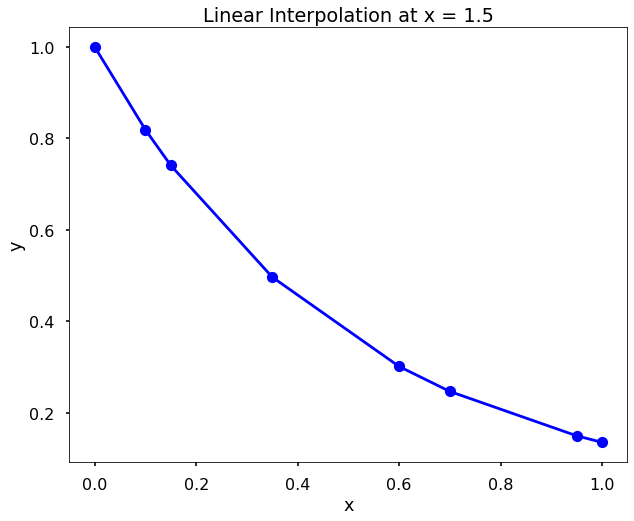

In [15]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-poster')

x = np.array([0, .1, .15, .35, .6, .7, .95, 1])
y = np.array([1, 0.8187, 0.7408, 0.4966, 0.3012, 0.2466, 0.1496, 0.1353])

plt.figure(figsize = (10,8))
plt.plot(x,y,'-ob') 
plt.title('Linear Interpolation of Data Points')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

#17.3 Cubic Spline

Cubic Spline Interpolation - The interpolating function is a set of piecewise cubic functions.

Assume (x_i, y_i) and (x_iplus1, y_iplus1) are joined by the cubic polynomial 

S_i(x) = a_i* x^3 + b_i* x^2 + c_i*x + d_i 

that is valid for x_i <= x <= x_iplus1 for i = 1,2,3,....,n


To Solve:
- First determine the a_i, b_i, c_i, and d_i values for each cubic function 
- For n points, there are n-1 cubic functions that connect all of the points that need to be found. 
- This means there are 4*(n-1) unknowns and 4*(n-1) independent equations that are needed to find all of the coefficients for the cubic functions 

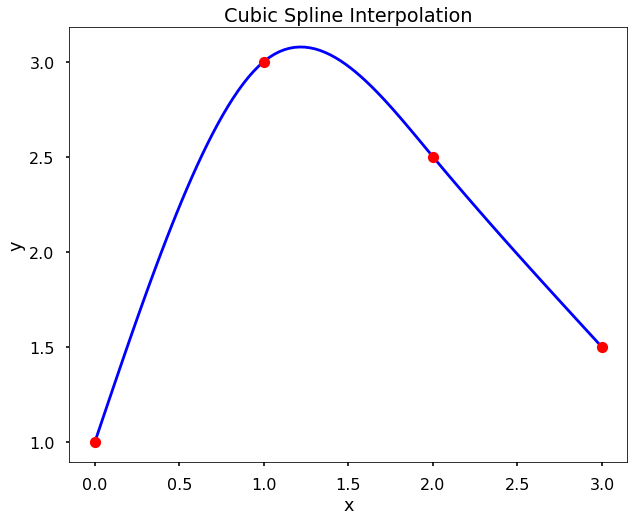

In [2]:
from scipy.interpolate import CubicSpline
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-poster')

x = [0,1,2,3]
y = [1,3,2.5,1.5]
f = CubicSpline(x,y, bc_type = 'natural')
x_new = np.linspace(0,3,100)
y_new = f(x_new)

plt.figure(figsize = (10,8))
plt.plot(x_new,y_new,'b',x,y,'ro') 
plt.title('Cubic Spline Interpolation')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

#17.4 Lagrange Polynomial Interpolation

Lagrange Polynomial Interpolation - Finds a single polynomial that goes through all the data.
- The Lagrange Polynomial should have the property L(x_i) = y_i 
- It is useful to write the polynomials as a linear combination of Lagrange Basis Polynomials P_i(x):
- P_i(x) = ((Π)^n,_j=1,j!=1) = (x-x_j)/(x_i-x_j)
- L(x) = ((Σ)^n, i=1)* y_i *P_i(x)
- P_i(x) has the property P_i(x_j)=1 when i=j and P_i(x_j) = 0 when i != j
- Since L(x) is a sum of these polynomials, L(x_i) = y_i



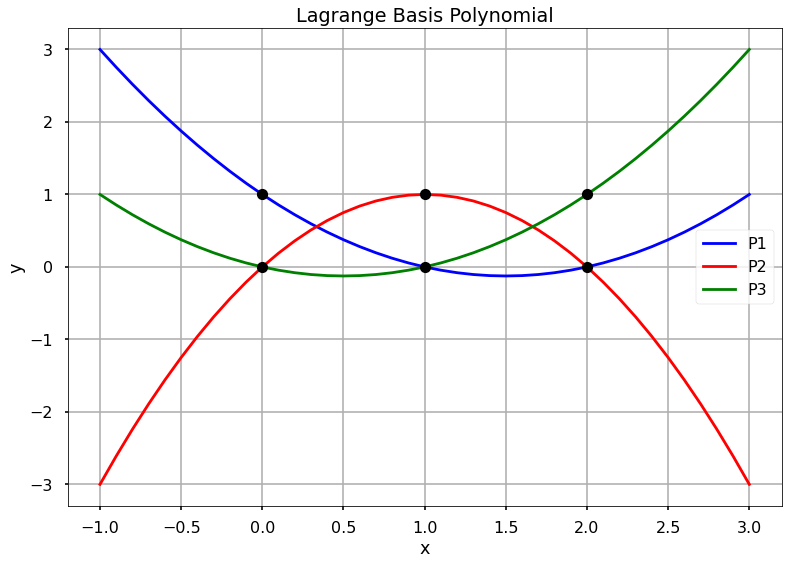

In [30]:
import numpy as np
import numpy.polynomial.polynomial as poly
import matplotlib.pyplot as plt
plt.style.use('seaborn-poster')

x = [0,1,2]
y = [1,3,2]

P1_coeff = [1, -1.5, 0.5]
P2_coeff = [0, 2, -1]
P3_coeff = [0, -0.5, 0.5]

P1 = poly.Polynomial(P1_coeff)
P2 = poly.Polynomial(P2_coeff)
P3 = poly.Polynomial(P3_coeff)

x_new = np.arange(-1.0, 3.1, 0.1)

plt.plot(x_new, P1(x_new), 'b', label = 'P1')
plt.plot(x_new, P2(x_new), 'r', label = 'P2')
plt.plot(x_new, P3(x_new), 'g', label = 'P3')

plt.plot(x,np.ones(len(x)), 'ko', x, np.zeros(len(x)), 'ko')
plt.title('Lagrange Basis Polynomial')
plt.xlabel('x')
plt.ylabel('y')
plt.grid()
plt.legend()
plt.show()


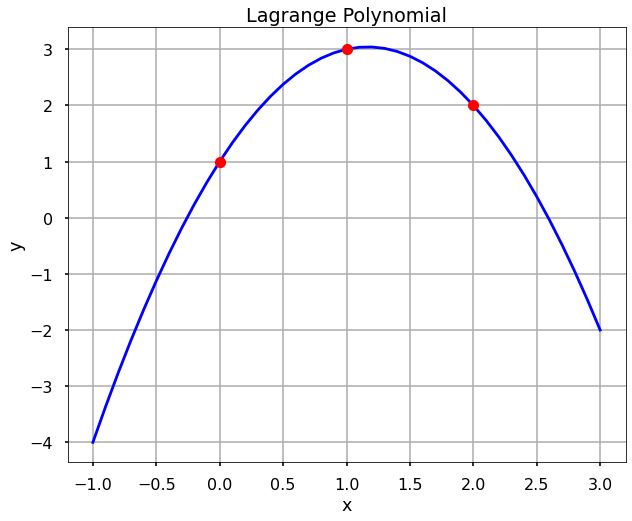

In [9]:
L = P1 + 3*P2 + 2*P3

fig = plt.figure(figsize = (10,8))
plt.plot(x_new, L(x_new), 'b', x, y, 'ro')
plt.title('Lagrange Polynomial')
plt.xlabel('x')
plt.ylabel('y')
plt.grid()
plt.show()

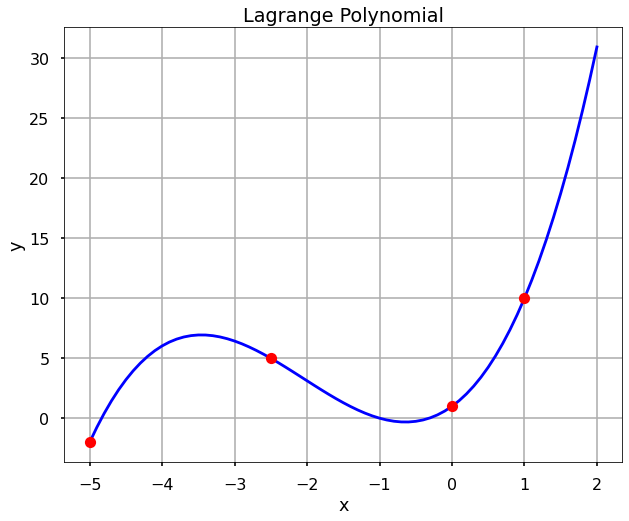

In [24]:
from scipy.interpolate import lagrange
import numpy as np
import numpy.polynomial.polynomial as poly
import matplotlib.pyplot as plt

f = lagrange(x,y)

fig = plt.figure(figsize = (10,8))
plt.plot(x_new, f(x_new), 'b', x, y, 'ro')
plt.title('Lagrange Polynomial')
plt.xlabel('x')
plt.ylabel('y')
plt.grid()
plt.show()

#17.5 Newton's Polynomial Interpolation

Newton's Polynomial Interpolation - Another method to exactly fit a set of data points. 

General form of a a n-1 order Newton's Polynomial that goes through n points is:

f(x) = a0 + a1* (x-x_0) + a2* (x-x_0)*(x-x_1) + ... + an* (x-x_0)* (x-x_1)* ...* (x-x_n)


Divided Differences Equation:

f[x_k, x_kminus1, ... , x_1, x_0] = ( f[x_k,x_kminus1,...,x_2,x_1] - f[x_kminus1, x_kminus2,...,x_1,x_0])/ (x_k - x_0) 


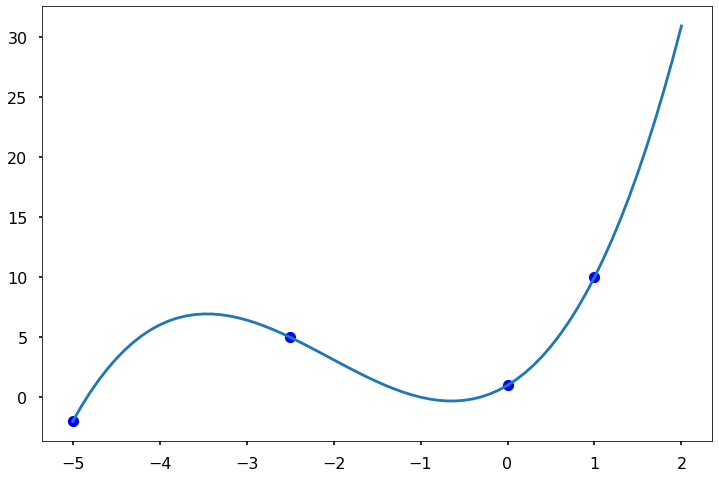

In [21]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-poster')
%matplotlib inline

def divided_diff(x,y):
  n = len(y)
  coef = np.zeros([n,n])
  coef[:,0] = y
  for j in range(1,n):
    for i in range(n-j):
      coef[i][j] = \
      (coef[i+1][j-1] - coef[i][j-1])/(x[i+j] - x[i])
  return coef 

def newton_poly(coef, x_data, x):
  n = len(x_data)-1
  p = coef[n]
  for k in range(1,n+1):
    p = coef[n-k] + (x - x_data[n-k])*p
  return p


x = np.array([-5,-2.5,0,1])
y = np.array([-2,5,1,10])
a_s = divided_diff(x,y)[0,:]

x_new = np.arange(-5,2.1,0.1)
y_new = newton_poly(a_s,x,x_new)

plt.figure(figsize = (12,8))
plt.plot(x,y,'bo')
plt.plot(x_new,y_new)
